In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
# https://github.com/garrettj403/SciencePlots : 과학 plot style 
# !pip install SciencePlots or poetry add SciencePlots

In [4]:
# plt.style.available # style 확인
plt.style.use(['science', 'notebook', 'grid'])

In [26]:
np.random.seed(1000)
x = np.linspace(0,15,30)
y = np.sin(x) + 0.1*np.random.randn(len(x))
xx = np.linspace(0,15,100)
yy = np.sin(xx)

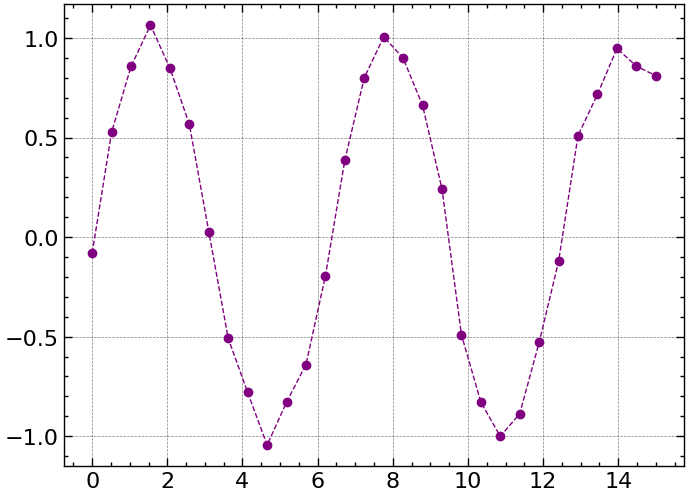

In [27]:
plt.plot(x,y, 'o--', color='purple', lw=1)

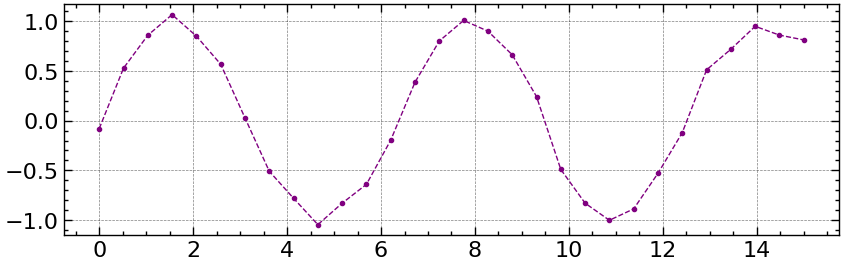

In [28]:
plt.figure(figsize=(10,3))
plt.plot(x,y, 'o--', color='purple', lw=1, ms=3)

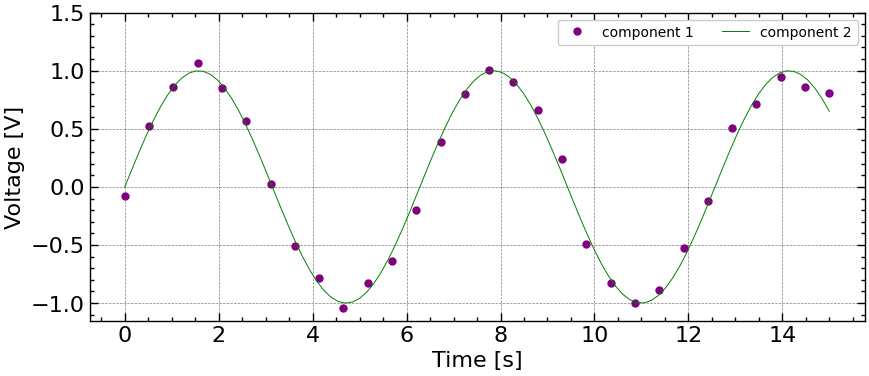

In [32]:
plt.figure(figsize=(10,4))
plt.plot(x,y, 'o', color='purple', lw=0.7, ms=5, label='component 1')
plt.plot(xx,yy, '-', color='green', lw=0.7, ms=5, label='component 2')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.ylim(top=1.5)
plt.legend(loc='upper right', fontsize=10, ncol=2)

In [34]:
res = np.random.randn(1000)*0.2 + 0.4

(array([  8.,  20.,  58., 142., 226., 225., 180.,  91.,  40.,  10.]),
 array([-0.23475601, -0.11385627,  0.00704346,  0.1279432 ,  0.24884293,
         0.36974266,  0.4906424 ,  0.61154213,  0.73244187,  0.8533416 ,
         0.97424133]),
 <BarContainer object of 10 artists>)

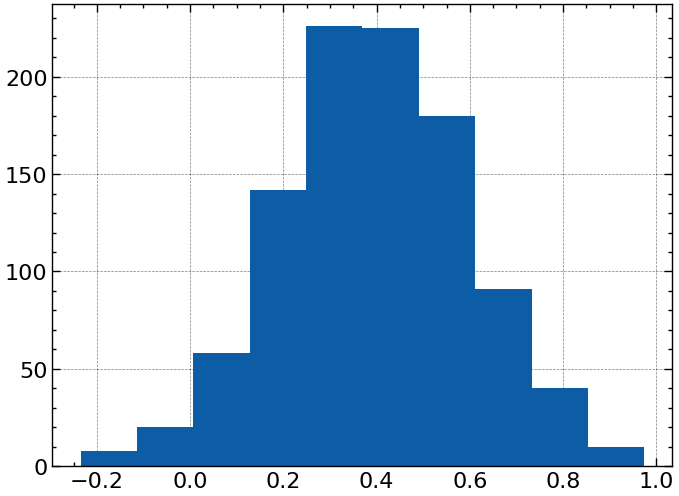

In [37]:
a = plt.hist(res)
a

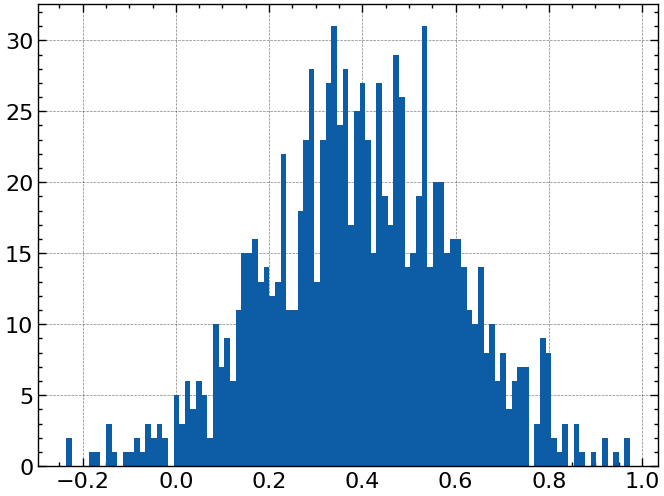

In [38]:
plt.hist(res, bins=100)
plt.show()

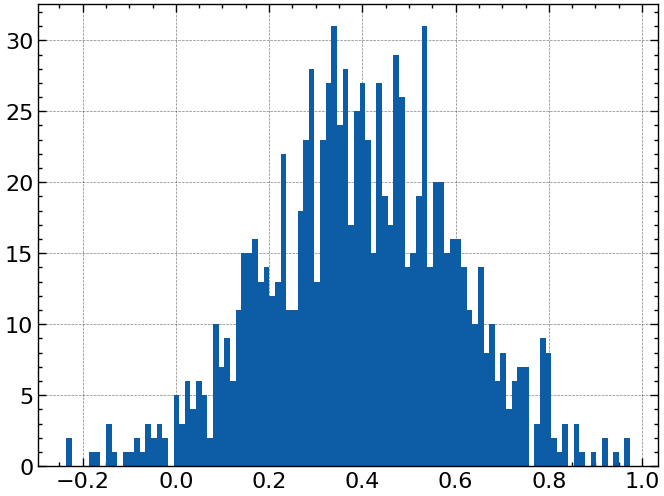

In [40]:
plt.hist(res, bins=100, density=False)
plt.show()

In [61]:
_ = np.linspace(-1,1,100)
x, y = np.meshgrid(_,_)
z = x**2+x*y

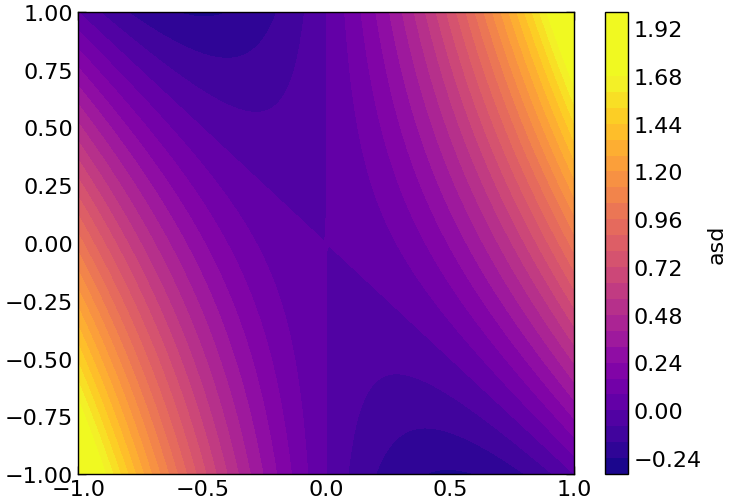

In [62]:
plt.contourf(x,y,z, levels=30, vmax=1.68, cmap='plasma')
plt.colorbar(label='asd')

In [54]:
# https://matplotlib.org/stable/gallery/color/named_colors.html
import math

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

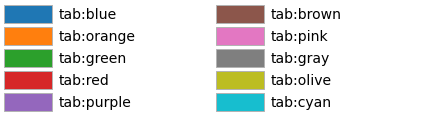

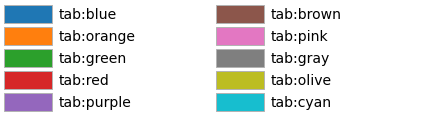

In [55]:
plot_colortable(mcolors.TABLEAU_COLORS, ncols=2, sort_colors=False)

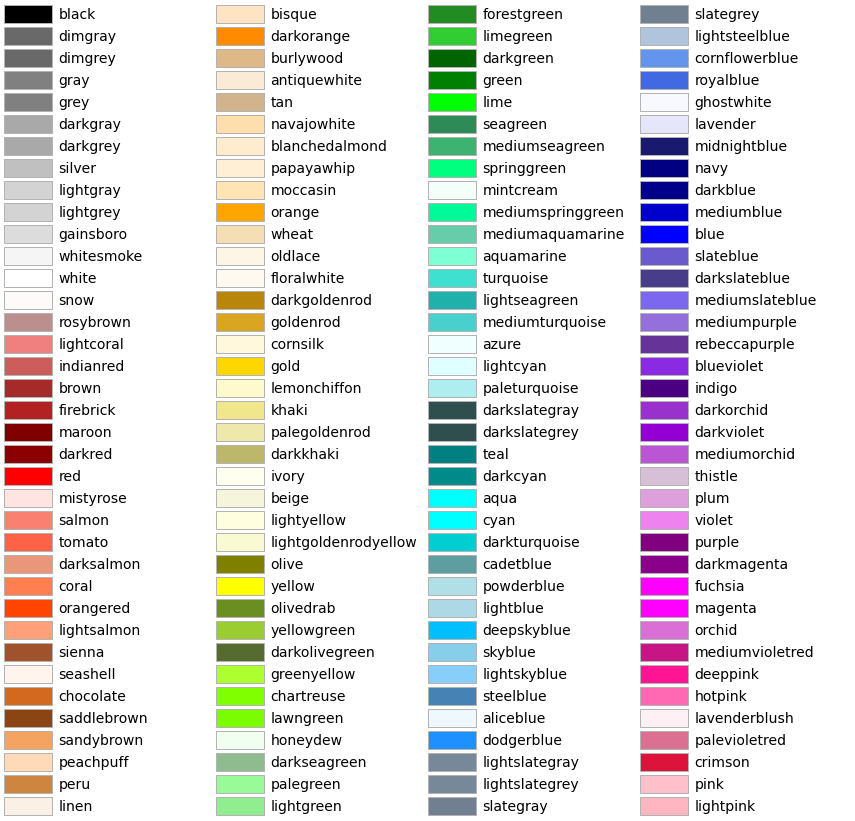

In [56]:
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

In [ ]:
# https://matplotlib.org/stable/users/explain/colors/index.html

<a list of 28 text.Text objects>

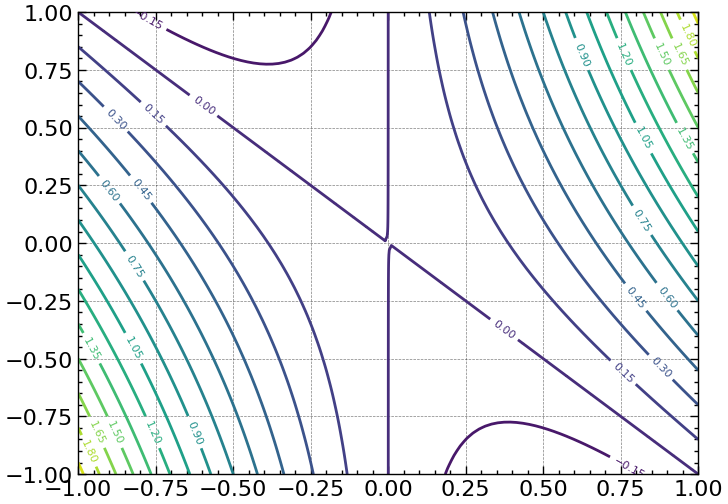

In [63]:
cs = plt.contour(x, y, z, levels=20)
plt.clabel(cs, fontsize=8)

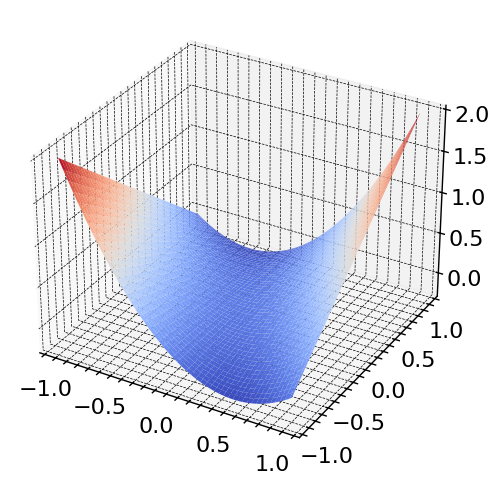

In [68]:
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
ax.plot_surface(x,y,z, cmap='coolwarm')

In [70]:
w = 3
_ = np.linspace(-3,3,100)
X,Y = np.meshgrid(_,_)
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

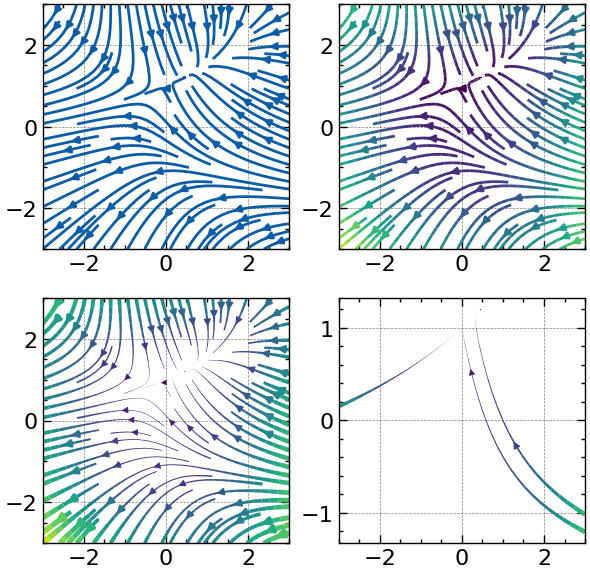

In [77]:
fig, axes = plt.subplots(2,2, figsize=(7,7))
axes[0][0].streamplot(X,Y,U,V)
axes[0][1].streamplot(X,Y,U,V, color=speed)
lw = 5*speed / speed.max()
axes[1][0].streamplot(X,Y,U,V, color=speed, linewidth=lw)
seedpoints=np.array([[0,1],[1,0]])
axes[1][1].streamplot(X,Y,U,V, start_points=seedpoints ,color=speed, linewidth=lw)